# Imports

In [1]:
# --- Standard libs ---
import os, pickle, glob

# --- Scientific stack ---
import numpy as np
import matplotlib.pyplot as plt

# --- Own Code ---
from plot_utils import (
#    decode_obs,
    plot_seeker_obs,
    plot_seeker_trajectory,
#    collect_tree_edges,
    plot_mcts_tree_xy_limited,
    inspect_debug_trace_xy,
    plot_dbg_step,
)

In [2]:
# Create environment for plot info
from rl_competition.competition.environment import create_exploration_seeker

# --- Real environment for rollouts / data collection ---

env, env_config = create_exploration_seeker()
obs, info = env.reset()

# Max steps constant

In [3]:
MAX_STEPS = 150

# Eval pkl folder

In [4]:
folder = "eval_traces_3D_exploration_temp3"
pkl_files = sorted(glob.glob(os.path.join(folder, "*.pkl")))

pkl_files

['eval_traces_3D_exploration_temp3\\traces_ep000000.pkl',
 'eval_traces_3D_exploration_temp3\\traces_ep000025.pkl',
 'eval_traces_3D_exploration_temp3\\traces_ep000050.pkl',
 'eval_traces_3D_exploration_temp3\\traces_ep000075.pkl',
 'eval_traces_3D_exploration_temp3\\traces_ep000100.pkl',
 'eval_traces_3D_exploration_temp3\\traces_ep000125.pkl',
 'eval_traces_3D_exploration_temp3\\traces_ep000150.pkl',
 'eval_traces_3D_exploration_temp3\\traces_ep000175.pkl',
 'eval_traces_3D_exploration_temp3\\traces_ep000200.pkl']

# Choose ep 0, set seeds list

In [5]:
i = 0  # <- choose index
with open(pkl_files[i], "rb") as f:
    traces = pickle.load(f)
print("Loaded pkl file: ", pkl_files[i])

Loaded pkl file:  eval_traces_3D_exploration_temp3\traces_ep000000.pkl


In [6]:
traces.keys()

dict_keys([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009])

In [7]:
seeds = list(traces.keys())

# Length check of all seeds for ep 0

In [8]:
lengths = []
for s in seeds:
    length = len(traces[s]["states"])
    lengths.append(length)
lengths

[151, 151, 151, 151, 151, 151, 151, 151, 151, 151]

In [9]:
count = sum(x >= MAX_STEPS for x in lengths)
print("number of episodes with MAX_STEP step count: ", count)

number of episodes with MAX_STEP step count:  10


# Check for rewards

In [10]:
total_rewards = []
for s in seeds:
    tr_reward_sum = sum(traces[s]["rewards"])
    total_rewards.append(tr_reward_sum)
total_rewards

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Choose seed to inspect

In [11]:
seed = seeds[0]
train_iter = traces[seed]["training_iteration"]

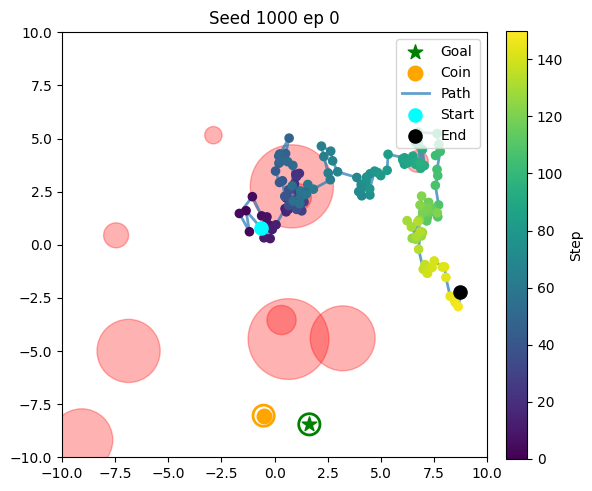

In [12]:
plot_seeker_trajectory(
    traces[seed]["states"],
    num_obstacles=env_config.num_obstacles,
    env=env,
    title=f"Seed {seed} ep {train_iter}",
)

<Axes: >

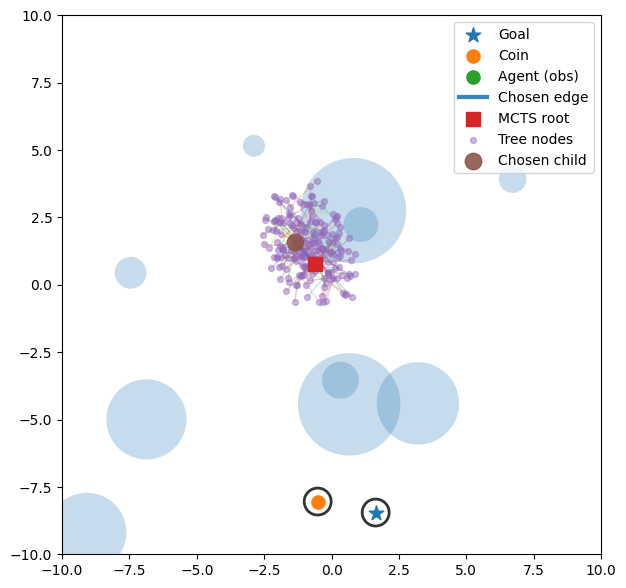

In [13]:
plot_mcts_tree_xy_limited(
    root=traces[seed]["roots"][0],
    num_obstacles=env_config.num_obstacles,
    chosen_child_idx=traces[seed]["chosen_idx"][0],
    max_depth=99,
    top_k_per_node=99,
    L=info.boundary_size if hasattr(info, "boundary_size") else 10,
    goal_radius=getattr(env.unwrapped, "_goal_radius", None),
    coin_radius=getattr(env.unwrapped, "_coin_radius", None),
)

# Plot tree search of selected SEED

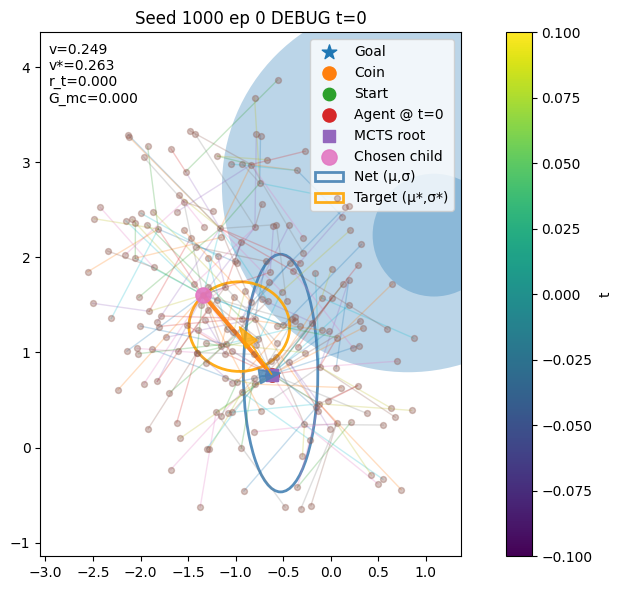

network: (array([0.09245209, 0.01568193, 0.2853384 ], dtype=float32), array([-0.9380088 ,  0.22304697,  0.140055  ], dtype=float32), 0.24875402450561523)
target: (array([-0.34142303,  0.50463176, -0.629965  ], dtype=float32), array([-0.6353604 , -0.75211984, -0.62683016], dtype=float32), 0.2630586083907117)


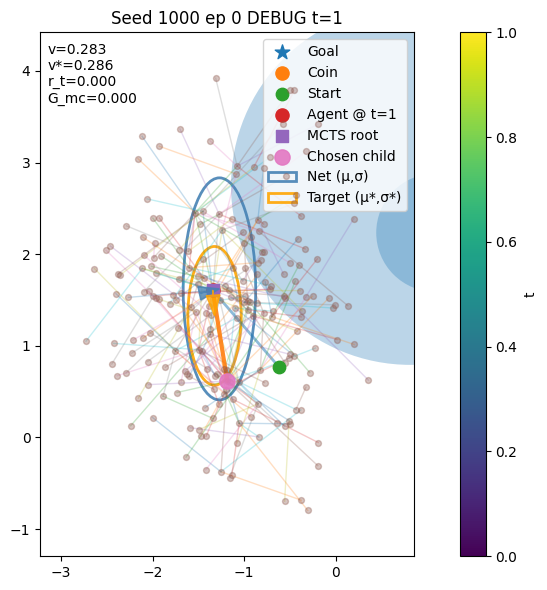

network: (array([0.07284127, 0.01605821, 0.2556371 ], dtype=float32), array([-0.9274415 ,  0.19200109,  0.10922071], dtype=float32), 0.2830314040184021)
target: (array([ 0.0192406 , -0.27783427, -0.54397386], dtype=float32), array([-1.2344853 , -0.2789071 , -0.82160795], dtype=float32), 0.2857999264554235)


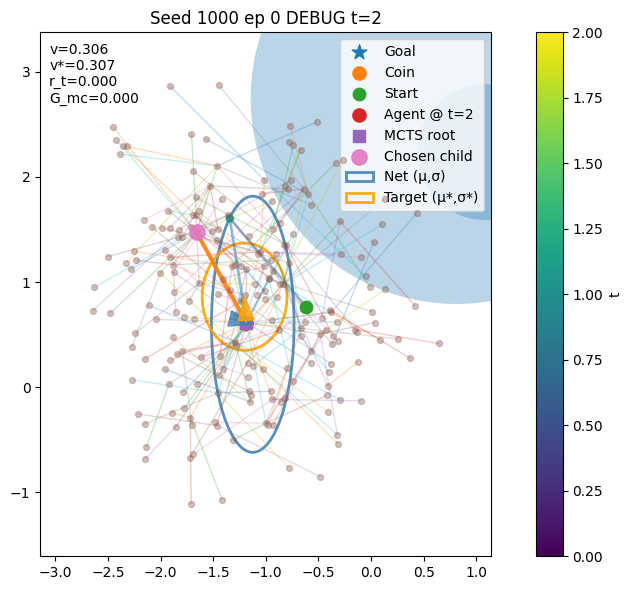

network: (array([ 0.06058395, -0.01528476,  0.2569555 ], dtype=float32), array([-0.934826  ,  0.1969593 ,  0.08835926], dtype=float32), 0.3062516748905182)
target: (array([-0.01724659,  0.24636896, -0.52675873], dtype=float32), array([-0.9083098 , -0.672993  , -0.73809946], dtype=float32), 0.30692995289396185)


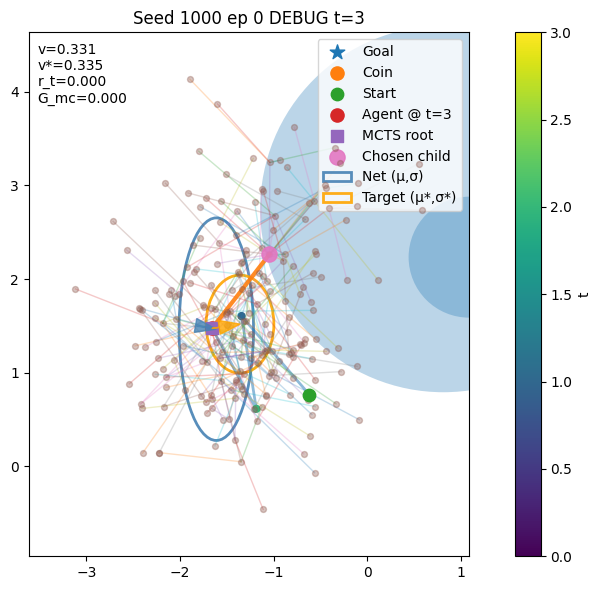

network: (array([ 0.04547658, -0.00813723,  0.23065908], dtype=float32), array([-0.92170835,  0.17249788,  0.06794877], dtype=float32), 0.33116385340690613)
target: (array([ 0.29853603,  0.04583088, -0.5889371 ], dtype=float32), array([-1.0164591 , -0.64770204, -0.67221034], dtype=float32), 0.3347916036743814)


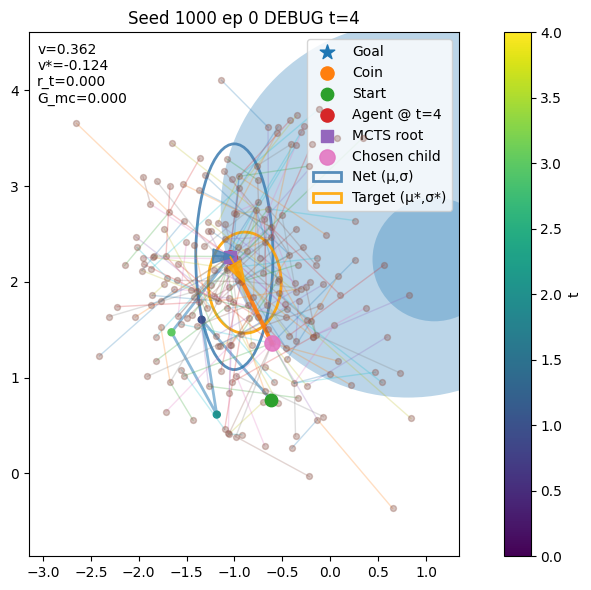

network: (array([ 0.04487723, -0.00133219,  0.21524784], dtype=float32), array([-0.90838456,  0.16416188,  0.03554569], dtype=float32), 0.36175498366355896)
target: (array([ 0.1529488 , -0.27218294, -0.34956285], dtype=float32), array([-0.9655134 , -0.63887686, -0.5863332 ], dtype=float32), -0.12405073567011331)


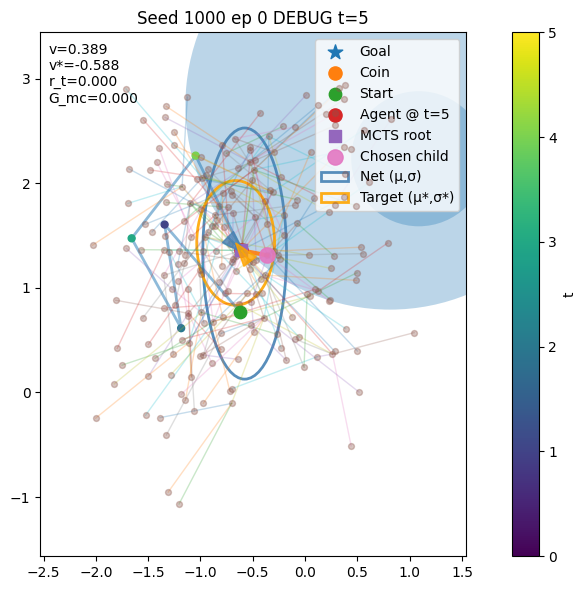

network: (array([ 0.0313465 , -0.03098192,  0.21221599], dtype=float32), array([-0.9161806 ,  0.18264247,  0.02231294], dtype=float32), 0.38883036375045776)
target: (array([-0.05465146,  0.07083843,  0.03873144], dtype=float32), array([-0.9887085 , -0.5171771 , -0.70995504], dtype=float32), -0.5877302583152154)


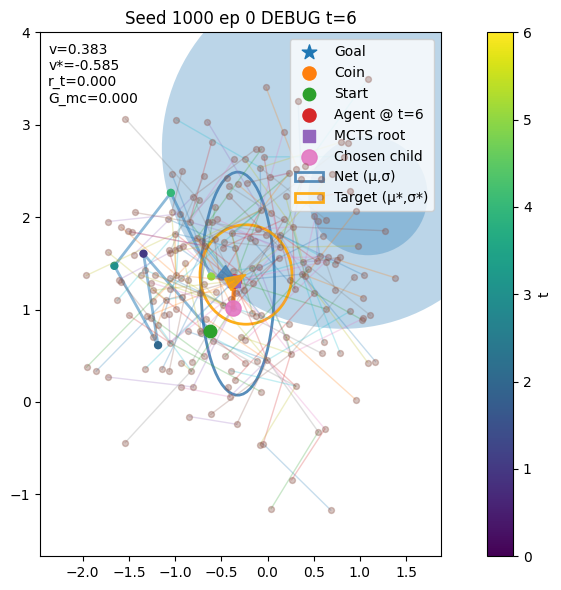

network: (array([ 0.03796593, -0.02949097,  0.21859363], dtype=float32), array([-0.91842115,  0.1883352 ,  0.02544157], dtype=float32), 0.38318467140197754)
target: (array([ 0.12710273,  0.06936464, -0.21126038], dtype=float32), array([-0.69786054, -0.61937666, -0.5306366 ], dtype=float32), -0.5845829987810006)


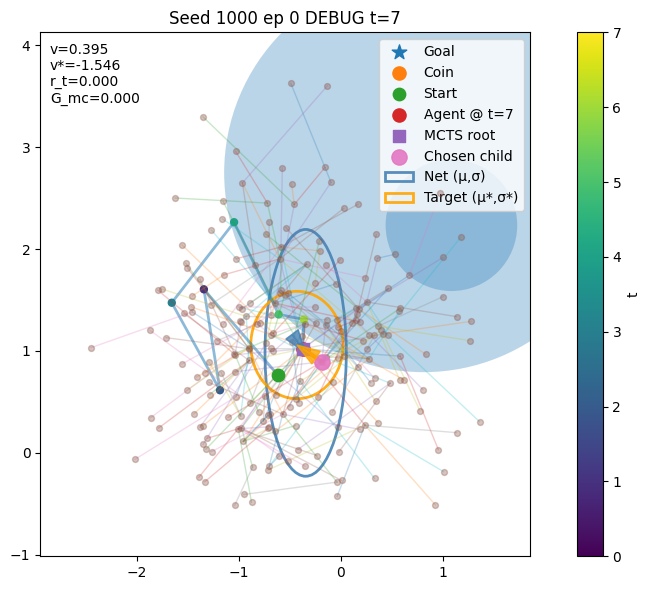

network: (array([ 0.02957573, -0.03982701,  0.21391086], dtype=float32), array([-0.9190297 ,  0.19166262,  0.02013747], dtype=float32), 0.3946669399738312)
target: (array([-0.0560392 ,  0.03687882, -0.04923072], dtype=float32), array([-0.79178226, -0.6402295 , -1.0213572 ], dtype=float32), -1.545536789626496)


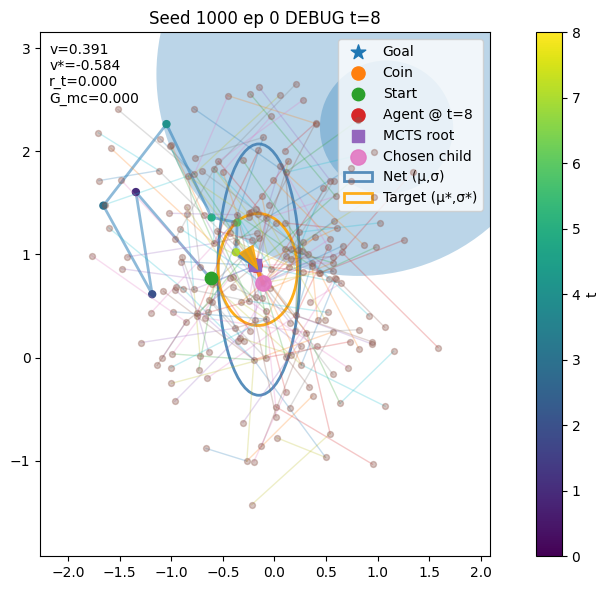

network: (array([ 0.03369455, -0.04078761,  0.21922404], dtype=float32), array([-0.9215697 ,  0.19745965,  0.02331126], dtype=float32), 0.3908502757549286)
target: (array([ 0.02298205, -0.03974723, -0.02724455], dtype=float32), array([-0.95635396, -0.61097735, -0.5256228 ], dtype=float32), -0.5836293506623027)


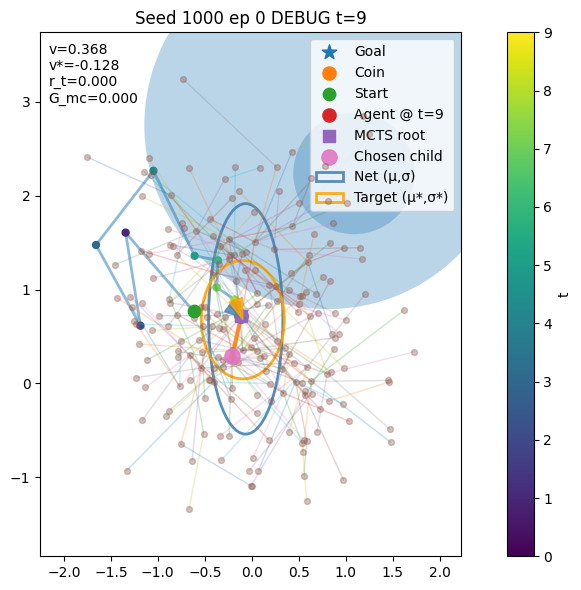

network: (array([ 0.0456326 , -0.03544087,  0.23400544], dtype=float32), array([-0.9280758 ,  0.20408802,  0.04164866], dtype=float32), 0.36752867698669434)
target: (array([ 0.01570597, -0.04460758, -0.00111145], dtype=float32), array([-0.81712365, -0.46241415, -0.6087425 ], dtype=float32), -0.12832898508864823)


In [14]:
n = len(traces[seed]["roots"])

for i in range(min(n, 10)):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True, sharey=True)
    plot_dbg_step(
        traces[seed],
        i,
        num_obstacles=env_config.num_obstacles,
        ax=ax,
        max_depth=99,
        top_k_per_node=99,
        title=f"Seed {seed} ep {train_iter} DEBUG t={i}"
    )
    plt.tight_layout()
    plt.show()
    print("network:", traces[seed]["network_outputs"][i])
    print("target:", traces[seed]["targets_from_root"][i])

# Check count of max length episodes over all seeds and all eval iterations

In [15]:
import gc

try:
    del traces
except NameError:
    pass
gc.collect()

counts = []
for pkl in pkl_files:
    with open(pkl, "rb") as f:
        traces = pickle.load(f)
    print("pkl loaded: ", pkl)

    lengths = []
    for s in seeds:
        length = len(traces[s]["states"])
        lengths.append(length)
    count = sum([x >= MAX_STEPS for x in lengths])
    counts.append(count)

pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000000.pkl
pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000025.pkl
pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000050.pkl
pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000075.pkl
pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000100.pkl
pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000125.pkl
pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000150.pkl
pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000175.pkl
pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000200.pkl


In [16]:
counts

[10, 9, 10, 10, 9, 9, 10, 10, 9]

# Load last training ep pkl

In [17]:
try:
    del traces
except NameError:
    pass
gc.collect()

with open(pkl_files[-1], "rb") as f:
    traces = pickle.load(f)
print("pkl loaded: ", pkl_files[-1])

pkl loaded:  eval_traces_3D_exploration_temp3\traces_ep000200.pkl


In [18]:
lengths = []
for s in seeds:
    length = len(traces[s]["states"])
    lengths.append(length)

In [19]:
lengths

[151, 151, 151, 151, 151, 151, 151, 31, 151, 151]

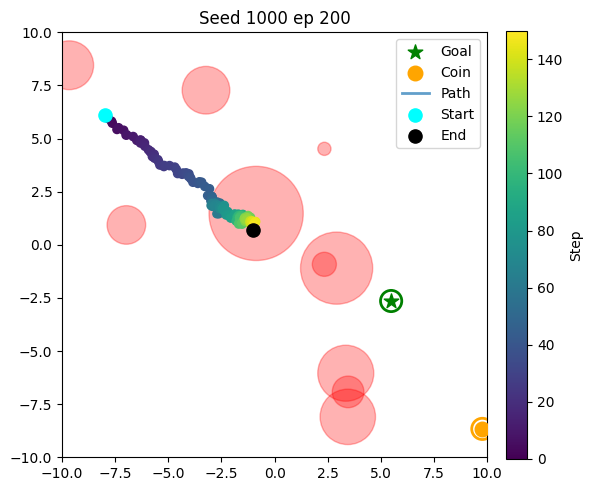

In [22]:
seed = seeds[0]
train_iter = traces[seed]["training_iteration"]
plot_seeker_trajectory(
    traces[seed]["states"],
    num_obstacles=env_config.num_obstacles,
    env=env,
    title=f"Seed {seed} ep {train_iter}",
)

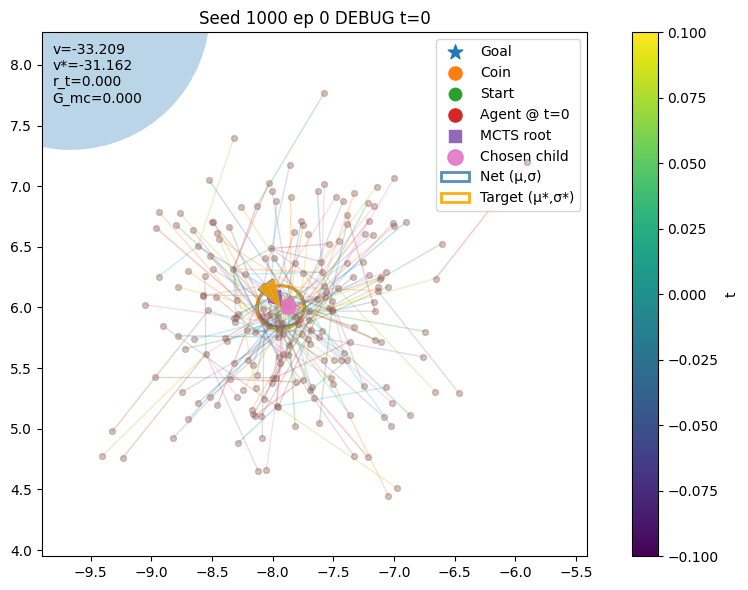

network: (array([ 0.06204673, -0.08781932,  0.0510021 ], dtype=float32), array([-1.6416711, -1.766266 , -1.920581 ], dtype=float32), -33.209129333496094)
target: (array([ 0.05494092, -0.09666053,  0.06717556], dtype=float32), array([-1.635312 , -1.7105585, -1.7730476], dtype=float32), -31.162433896942726)


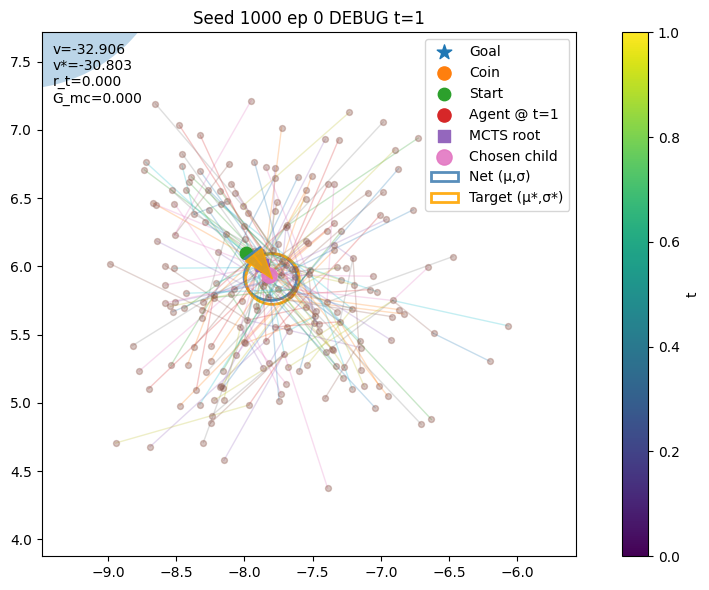

network: (array([ 0.06456146, -0.08713378,  0.04630379], dtype=float32), array([-1.6414313, -1.7655675, -1.9204621], dtype=float32), -32.90610885620117)
target: (array([ 0.07883308, -0.10129999,  0.06640205], dtype=float32), array([-1.627716 , -1.6832258, -1.736022 ], dtype=float32), -30.802826793062643)


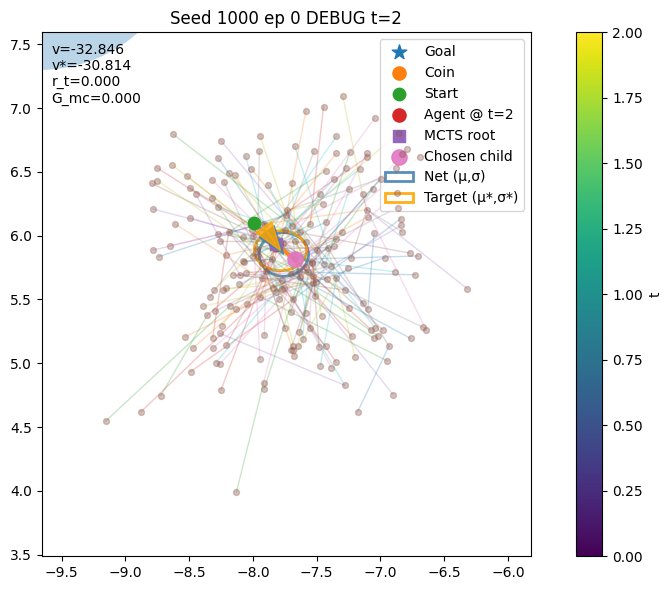

network: (array([ 0.06487499, -0.08548657,  0.0475259 ], dtype=float32), array([-1.6410084, -1.7653383, -1.9201741], dtype=float32), -32.84648895263672)
target: (array([ 0.03912089, -0.05596652,  0.04614438], dtype=float32), array([-1.5851727, -1.8555088, -2.036912 ], dtype=float32), -30.813562377310575)


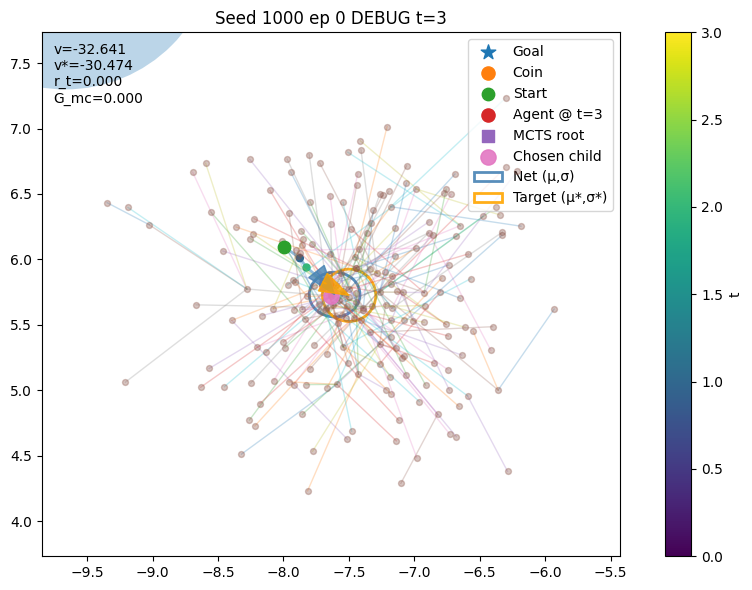

network: (array([ 0.06504454, -0.08277829,  0.04826068], dtype=float32), array([-1.6407406, -1.7653885, -1.9200907], dtype=float32), -32.64053726196289)
target: (array([ 0.17586584, -0.08804606,  0.09793643], dtype=float32), array([-1.5911787, -1.6095674, -1.7058713], dtype=float32), -30.47416938042605)


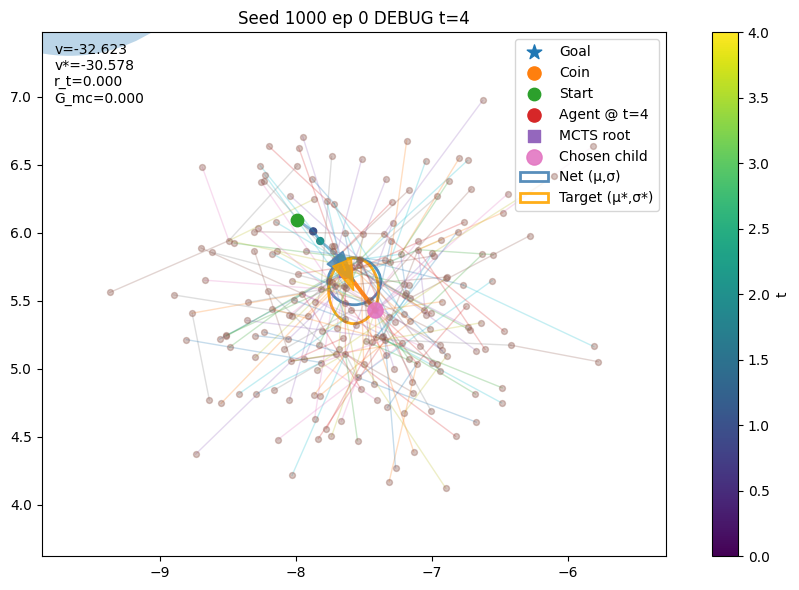

network: (array([ 0.06564085, -0.08048517,  0.05091571], dtype=float32), array([-1.6404936, -1.765536 , -1.9198653], dtype=float32), -32.623329162597656)
target: (array([ 0.06070717, -0.14807305,  0.03848012], dtype=float32), array([-1.695708 , -1.4182576, -1.9495714], dtype=float32), -30.577887172090488)


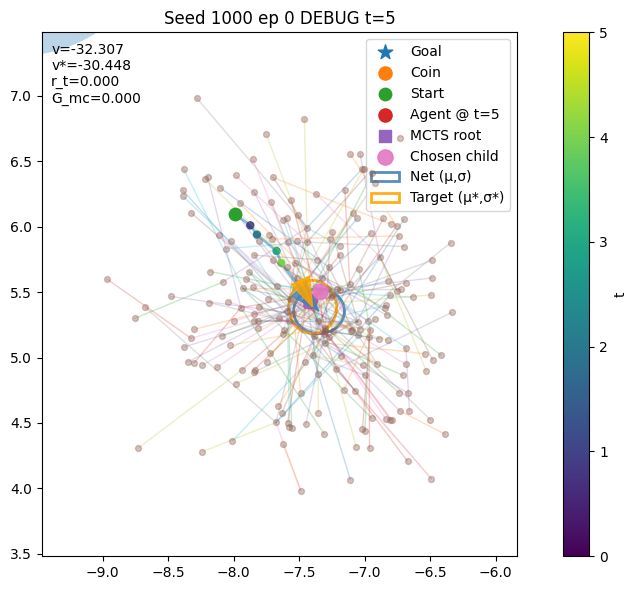

network: (array([ 0.06814435, -0.07418818,  0.05388884], dtype=float32), array([-1.6397759, -1.7655188, -1.9193556], dtype=float32), -32.30681610107422)
target: (array([ 0.01925837, -0.04220604,  0.03558438], dtype=float32), array([-1.6984423, -1.5924042, -1.9222304], dtype=float32), -30.44774744167876)


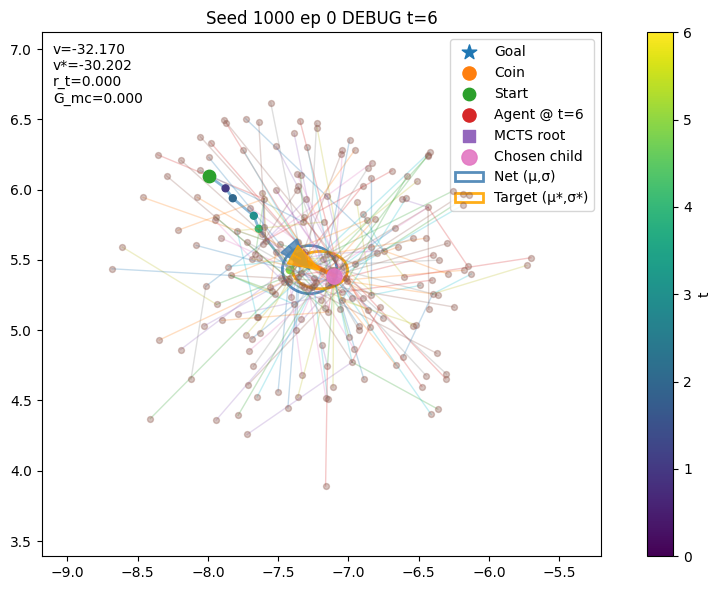

network: (array([ 0.06628896, -0.07623224,  0.05003666], dtype=float32), array([-1.6402415, -1.7656388, -1.9199176], dtype=float32), -32.169681549072266)
target: (array([ 0.14061938, -0.07973266, -0.02160038], dtype=float32), array([-1.6336206, -2.0177279, -1.466947 ], dtype=float32), -30.202096942559535)


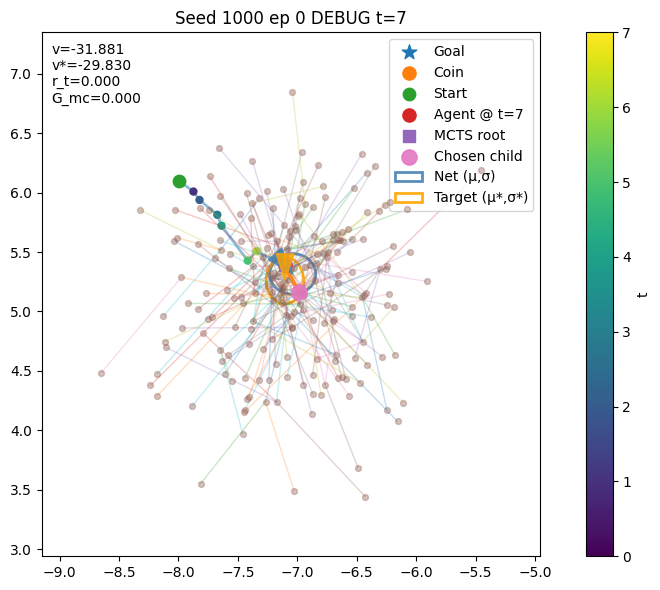

network: (array([ 0.06434523, -0.07323498,  0.05090912], dtype=float32), array([-1.640595 , -1.7665918, -1.9204822], dtype=float32), -31.880983352661133)
target: (array([-0.00163743, -0.12870783,  0.05928783], dtype=float32), array([-1.8458962, -1.628478 , -1.7795947], dtype=float32), -29.830371003093795)


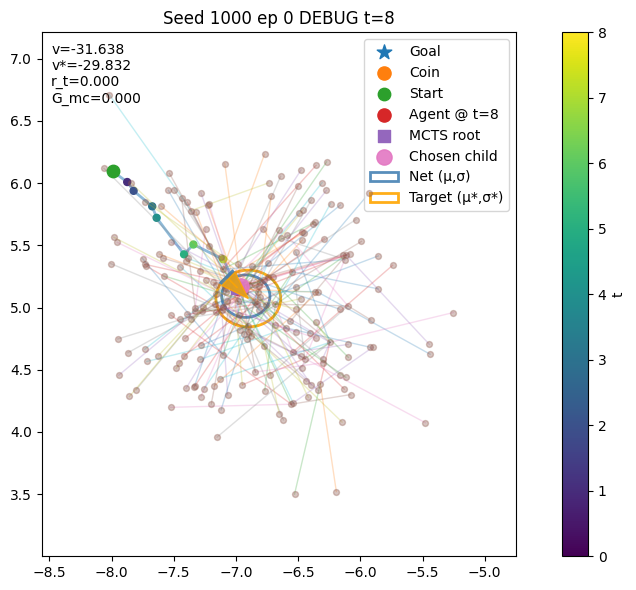

network: (array([ 0.06839359, -0.06883129,  0.05121827], dtype=float32), array([-1.640474 , -1.766723 , -1.9203433], dtype=float32), -31.63751792907715)
target: (array([ 0.08832867, -0.08784305,  0.09962833], dtype=float32), array([-1.345485 , -1.4773262, -1.497966 ], dtype=float32), -29.832447803828718)


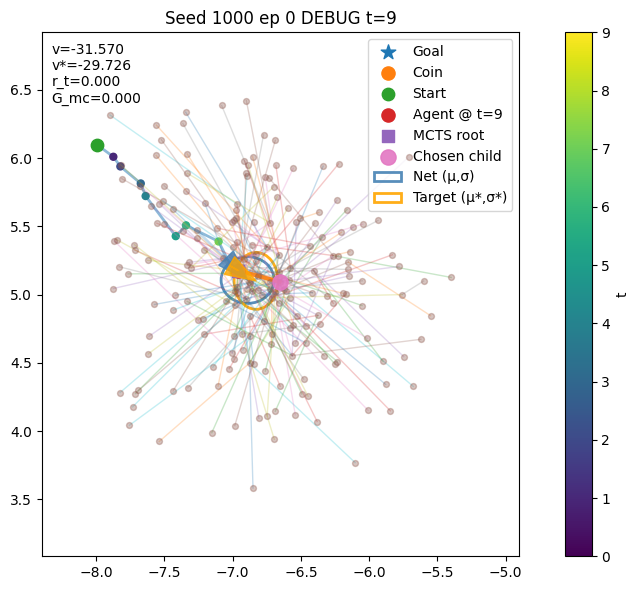

network: (array([ 0.06815705, -0.06928994,  0.0494755 ], dtype=float32), array([-1.6406468, -1.7667743, -1.9205537], dtype=float32), -31.56968879699707)
target: (array([ 0.13039328, -0.07550689, -0.00150495], dtype=float32), array([-1.8284451, -1.5690032, -1.9070618], dtype=float32), -29.726290055004004)


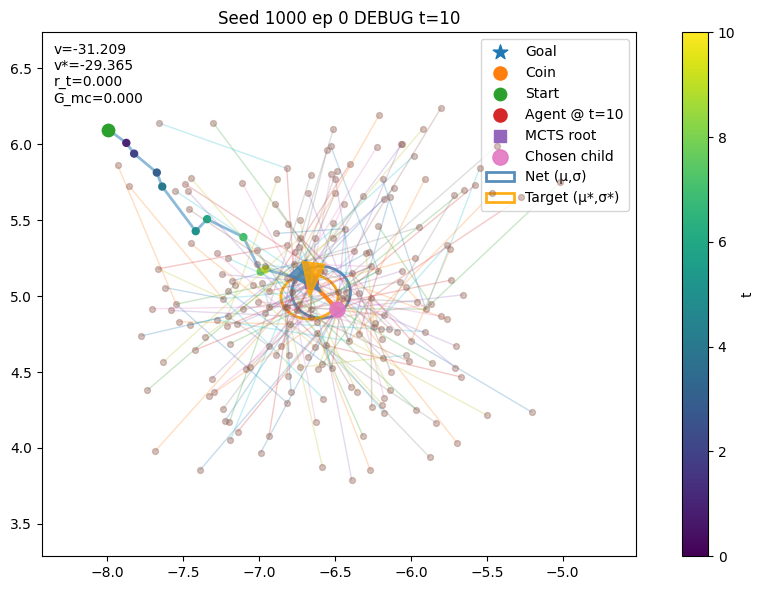

network: (array([ 0.06469271, -0.06766069,  0.04945451], dtype=float32), array([-1.6420763, -1.7686188, -1.9222229], dtype=float32), -31.20907211303711)
target: (array([-0.01196561, -0.09782934,  0.00273576], dtype=float32), array([-1.6709677, -1.9193664, -1.9387316], dtype=float32), -29.364812627621056)


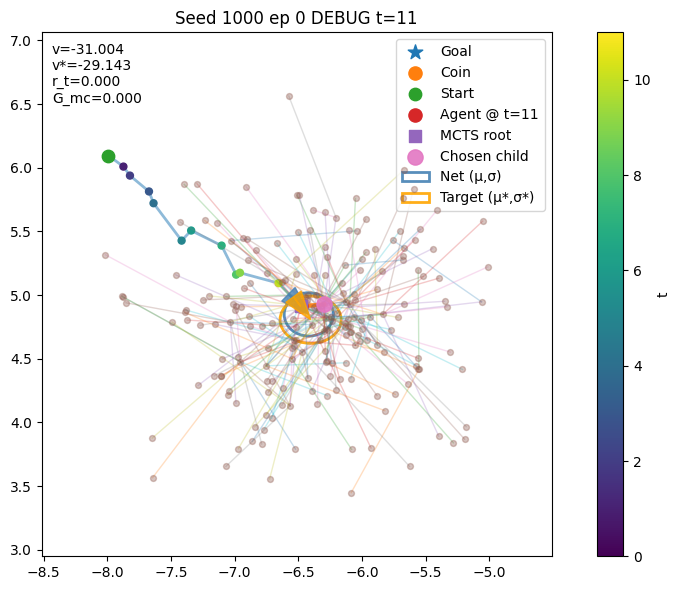

network: (array([ 0.06544621, -0.06449873,  0.05240544], dtype=float32), array([-1.6429881, -1.7698926, -1.9232223], dtype=float32), -31.004060745239258)
target: (array([ 0.07931483, -0.10658915,  0.08278539], dtype=float32), array([-1.4271001, -1.6846979, -1.6372435], dtype=float32), -29.14308793554314)


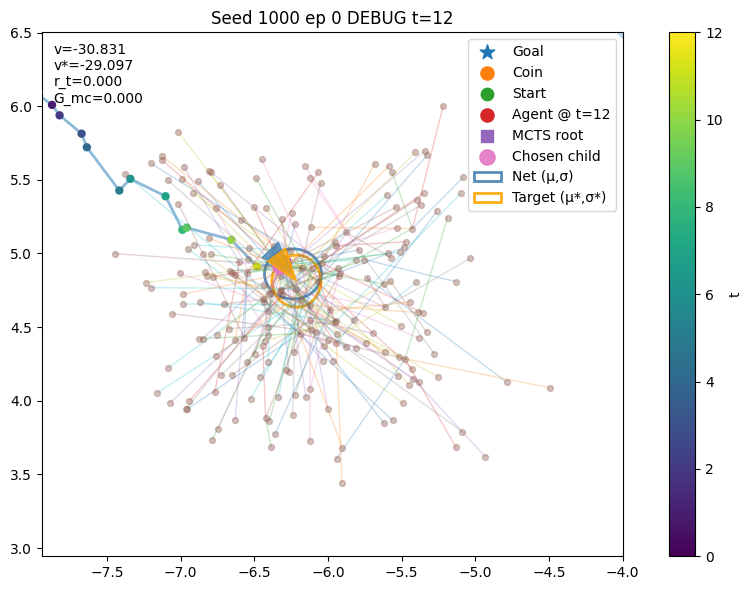

network: (array([ 0.06151124, -0.06504685,  0.05093454], dtype=float32), array([-1.642674 , -1.7697016, -1.9232651], dtype=float32), -30.830717086791992)
target: (array([ 0.08475313, -0.11411211,  0.0095295 ], dtype=float32), array([-1.7937683, -1.7315727, -1.7549977], dtype=float32), -29.097112243069933)


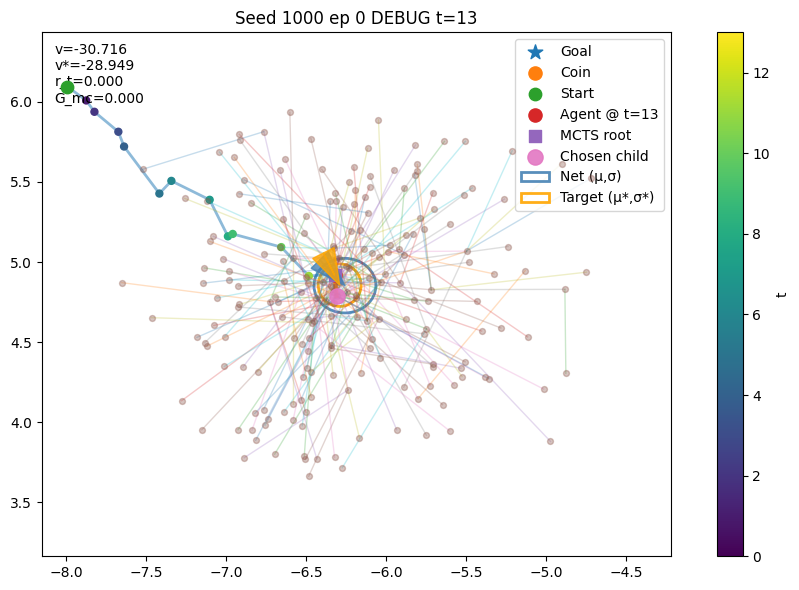

network: (array([ 0.06467295, -0.06586884,  0.04617009], dtype=float32), array([-1.6430817, -1.7694862, -1.9236941], dtype=float32), -30.715614318847656)
target: (array([ 0.03184693, -0.06284469,  0.09561559], dtype=float32), array([-2.0103962, -2.0190184, -1.6686801], dtype=float32), -28.948511188117216)


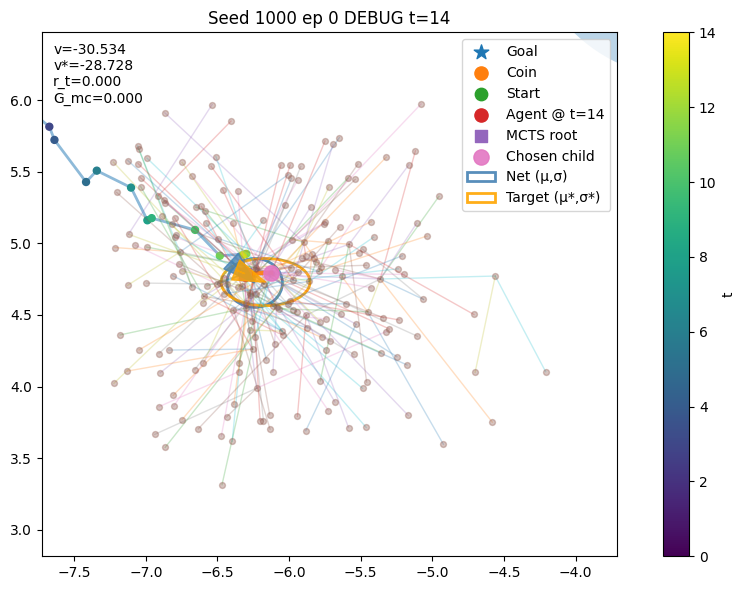

network: (array([ 0.07023242, -0.06530535,  0.04164516], dtype=float32), array([-1.6428998, -1.7685763, -1.9235879], dtype=float32), -30.534143447875977)
target: (array([ 0.14563592, -0.05922874,  0.06404408], dtype=float32), array([-1.1698647, -1.803788 , -1.8926415], dtype=float32), -28.72765560121952)


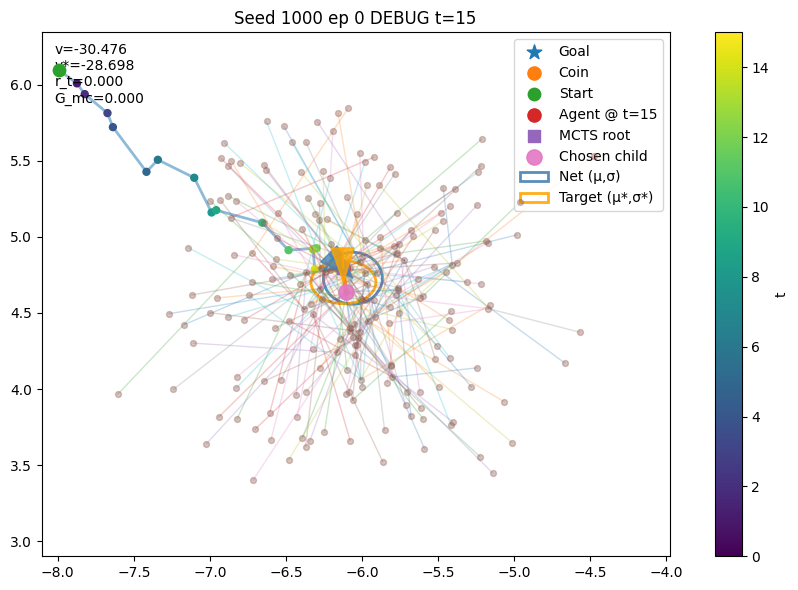

network: (array([ 0.06447463, -0.06549966,  0.04308566], dtype=float32), array([-1.6412971, -1.7674258, -1.9223809], dtype=float32), -30.47590446472168)
target: (array([ 0.00232135, -0.09146894,  0.14569084], dtype=float32), array([-1.5448704, -1.955835 , -1.6892267], dtype=float32), -28.698430967421363)


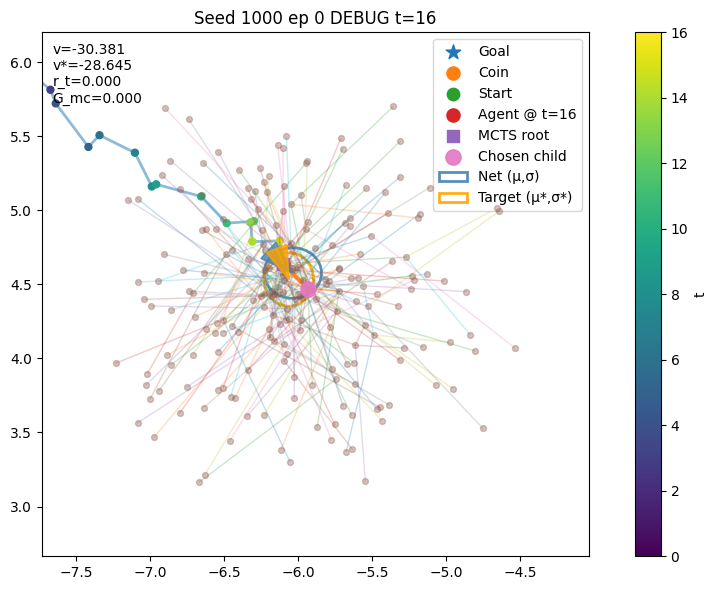

network: (array([ 0.06870233, -0.06389909,  0.04237875], dtype=float32), array([-1.6408317, -1.7666667, -1.9219387], dtype=float32), -30.38062286376953)
target: (array([ 0.04217618, -0.10712569,  0.03644161], dtype=float32), array([-1.7909946, -1.7109687, -1.2989248], dtype=float32), -28.64471496078068)


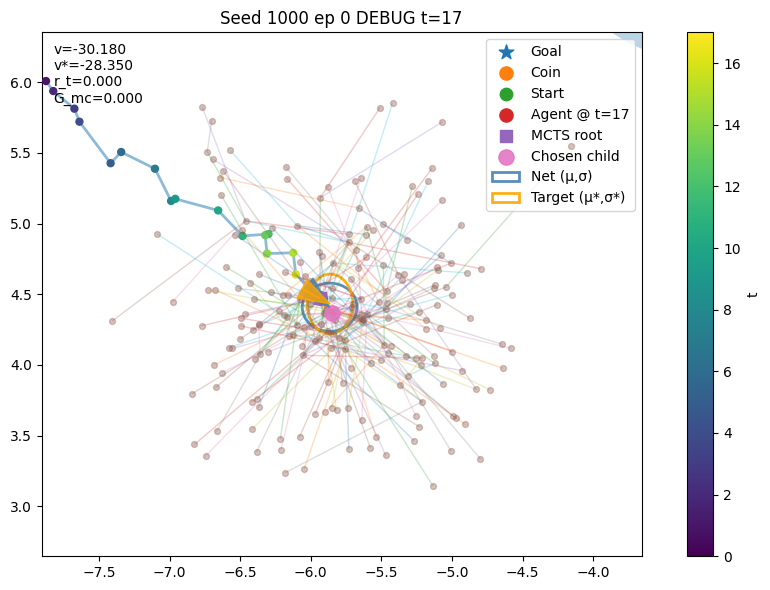

network: (array([ 0.06971256, -0.0626017 ,  0.04098268], dtype=float32), array([-1.639103 , -1.7647564, -1.9205818], dtype=float32), -30.180463790893555)
target: (array([ 0.07229148, -0.03885638,  0.04892236], dtype=float32), array([-1.8227304, -1.5560174, -1.961382 ], dtype=float32), -28.35033004546475)


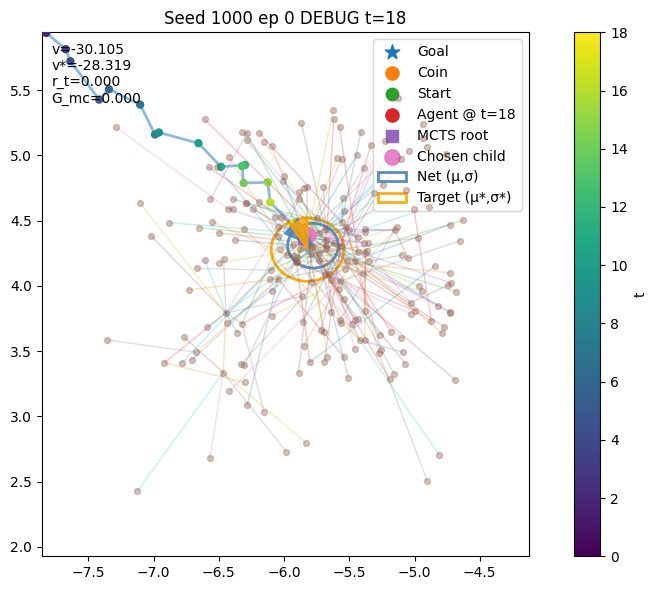

network: (array([ 0.06999476, -0.06150477,  0.0415647 ], dtype=float32), array([-1.6381149, -1.7638109, -1.9197627], dtype=float32), -30.104841232299805)
target: (array([ 0.02892874, -0.09082513,  0.04810699], dtype=float32), array([-1.2748276, -1.4130721, -1.9943578], dtype=float32), -28.319473711491856)


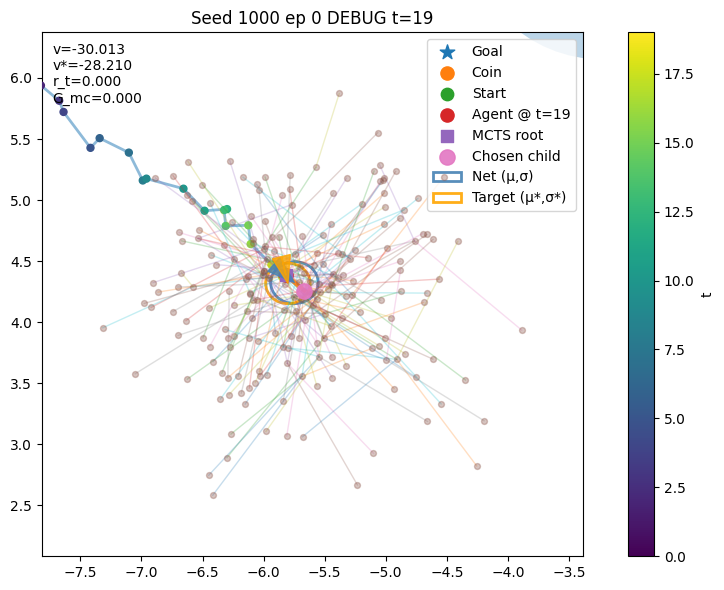

network: (array([ 0.07022804, -0.06242727,  0.03837567], dtype=float32), array([-1.6380512, -1.763433 , -1.919822 ], dtype=float32), -30.013141632080078)
target: (array([ 0.01672753, -0.06862071,  0.12816589], dtype=float32), array([-1.7009795, -1.7964699, -1.7182457], dtype=float32), -28.209879812581654)


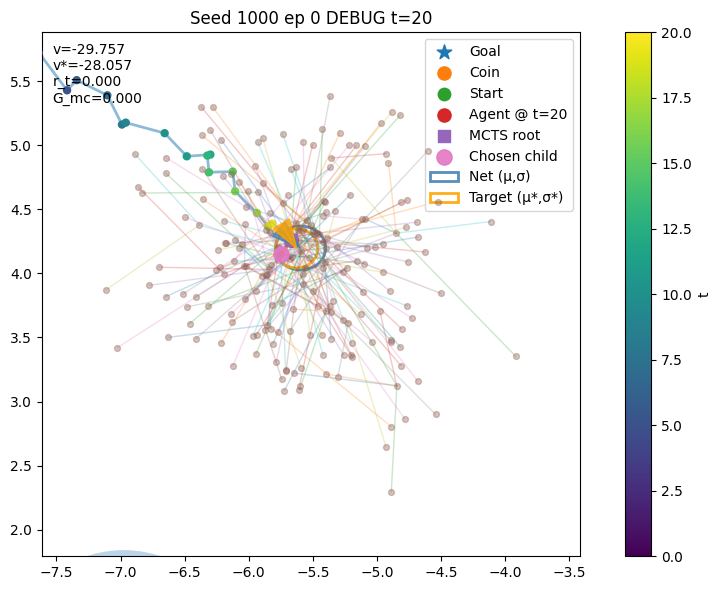

network: (array([ 0.07201402, -0.06223395,  0.0335687 ], dtype=float32), array([-1.6367439, -1.761705 , -1.9189885], dtype=float32), -29.75654411315918)
target: (array([ 0.04072937, -0.06406999,  0.11349443], dtype=float32), array([-1.7985984, -1.8730444, -1.8326045], dtype=float32), -28.056869154850233)


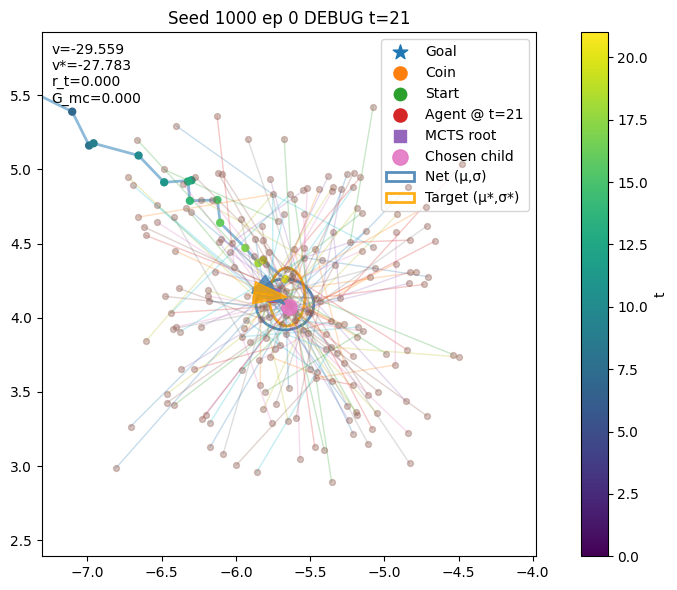

network: (array([ 0.08091888, -0.06230009,  0.02585718], dtype=float32), array([-1.6375592, -1.7614006, -1.9197814], dtype=float32), -29.559358596801758)
target: (array([ 0.09560685, -0.01243173,  0.04913405], dtype=float32), array([-2.1197603, -1.6320709, -1.7320639], dtype=float32), -27.78329369090843)


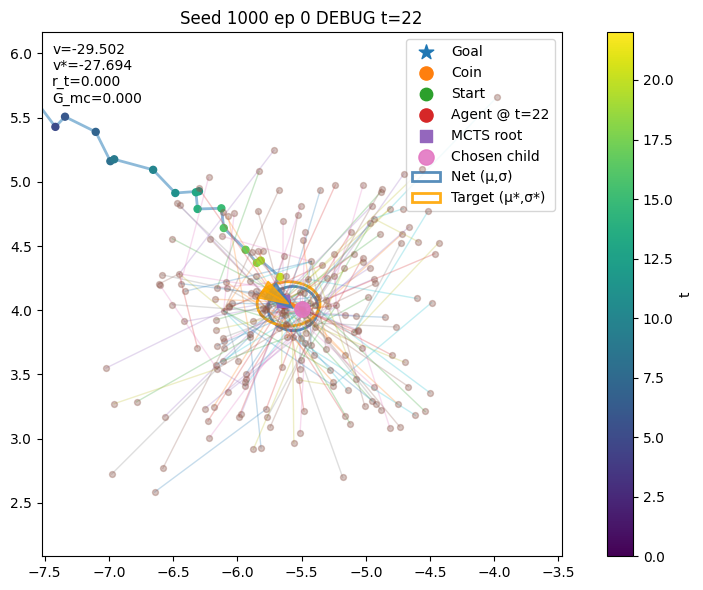

network: (array([ 0.07972804, -0.06128918,  0.0270079 ], dtype=float32), array([-1.636889 , -1.7609   , -1.9192628], dtype=float32), -29.502063751220703)
target: (array([ 0.04404814, -0.02483314,  0.06765689], dtype=float32), array([-1.4074742, -1.7586601, -1.9168714], dtype=float32), -27.693596012441557)


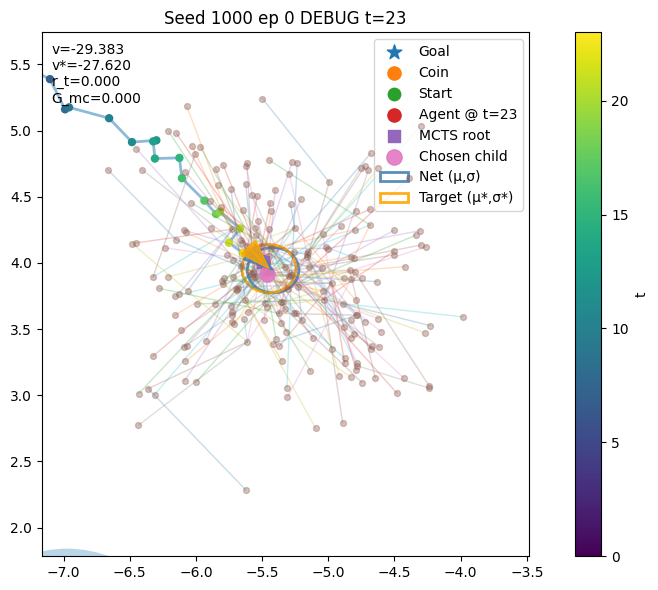

network: (array([ 0.07808916, -0.06072889,  0.02620909], dtype=float32), array([-1.6363329, -1.7602922, -1.9189454], dtype=float32), -29.38340950012207)
target: (array([ 0.04681754, -0.04908507,  0.00469135], dtype=float32), array([-1.5862484, -1.7000339, -1.8010424], dtype=float32), -27.619763467153508)


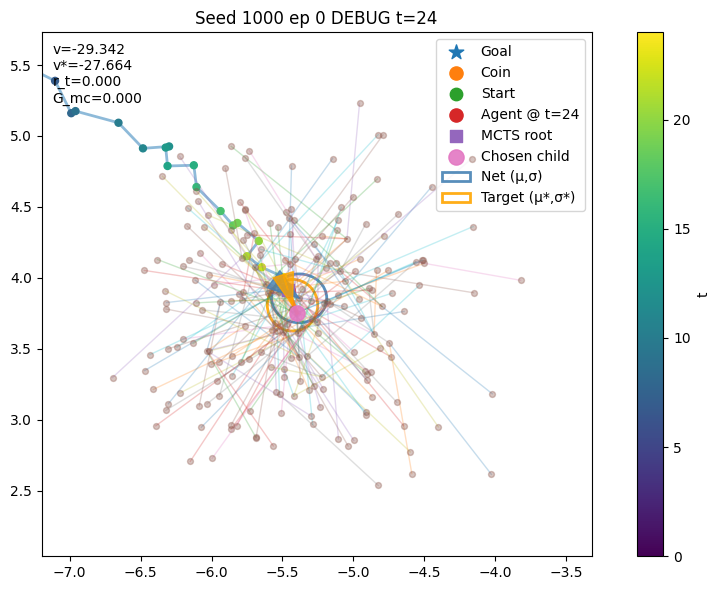

network: (array([ 0.07937554, -0.0595132 ,  0.0269152 ], dtype=float32), array([-1.6363986, -1.7603507, -1.9190049], dtype=float32), -29.341821670532227)
target: (array([ 0.03288722, -0.10807181,  0.10827544], dtype=float32), array([-1.7285467, -1.7046112, -1.5497574], dtype=float32), -27.66428132541728)


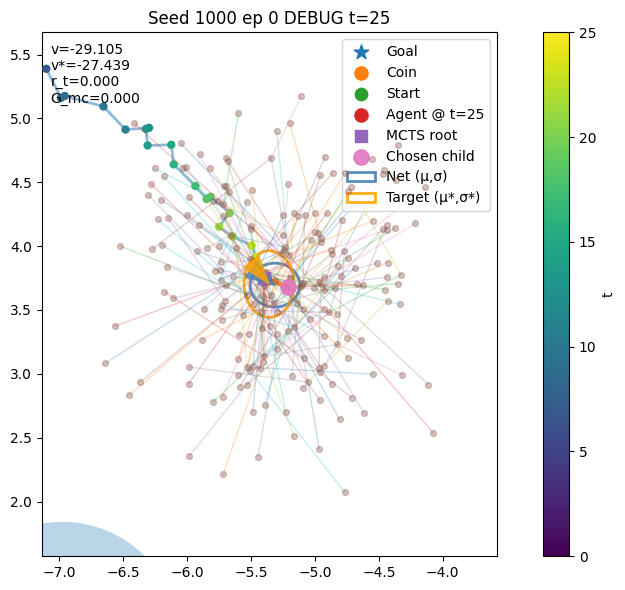

network: (array([ 0.0855137 , -0.05859281,  0.02134918], dtype=float32), array([-1.6366829, -1.7596854, -1.9193703], dtype=float32), -29.104511260986328)
target: (array([ 0.04003217, -0.04995248,  0.08571675], dtype=float32), array([-1.6321023, -1.3439792, -1.5990683], dtype=float32), -27.439258849327445)


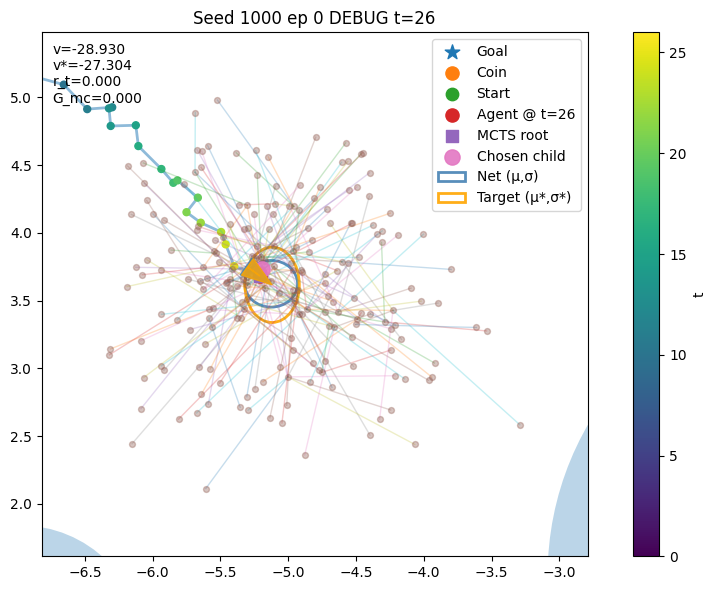

network: (array([ 0.08397304, -0.05826115,  0.01941391], dtype=float32), array([-1.6365155, -1.7593052, -1.9195328], dtype=float32), -28.92975616455078)
target: (array([ 0.09068772, -0.06592084,  0.03628422], dtype=float32), array([-1.603991 , -1.2812976, -1.4146615], dtype=float32), -27.30429118529982)


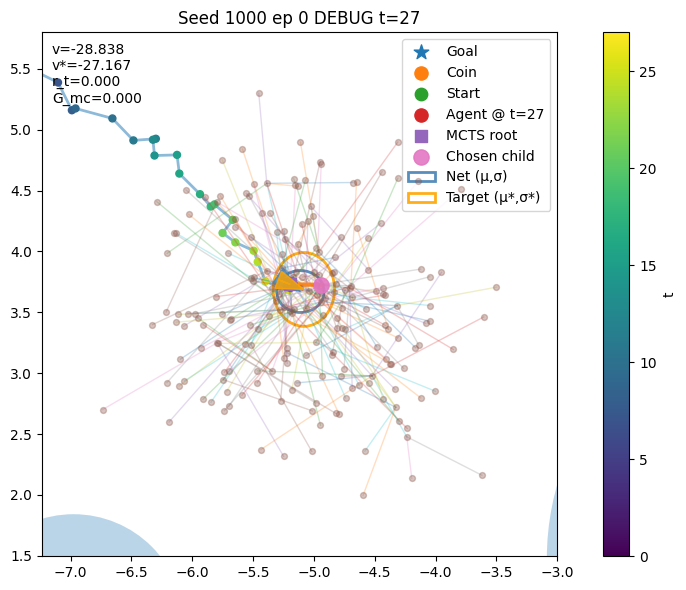

network: (array([ 0.08468559, -0.05968945,  0.01448718], dtype=float32), array([-1.6363537, -1.7586188, -1.9195961], dtype=float32), -28.83802032470703)
target: (array([ 0.11333244, -0.04276794,  0.0247428 ], dtype=float32), array([-1.378606 , -1.1921612, -1.7493277], dtype=float32), -27.167269369577195)


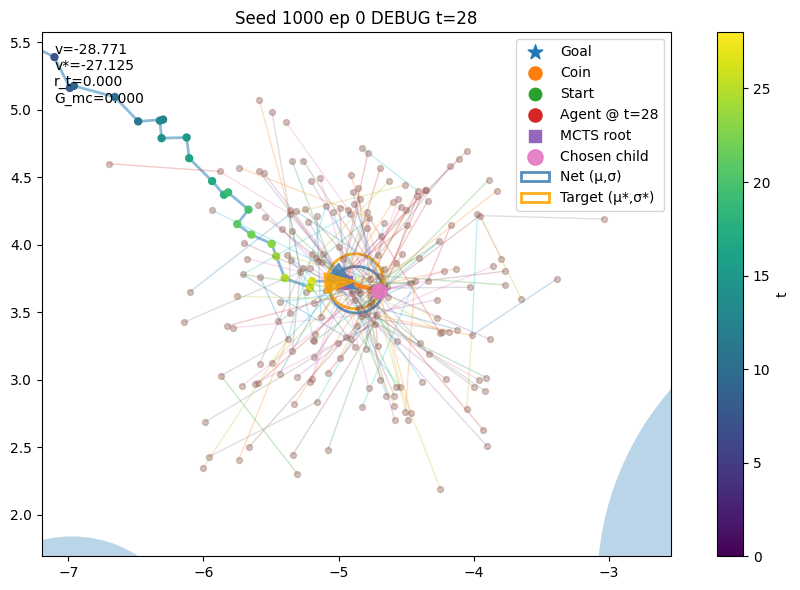

network: (array([ 0.0771472 , -0.05933779,  0.01687273], dtype=float32), array([-1.6358249, -1.7586352, -1.9196043], dtype=float32), -28.770814895629883)
target: (array([0.06682367, 0.00390852, 0.08258356], dtype=float32), array([-1.5748097, -1.593379 , -1.525001 ], dtype=float32), -27.12450998367978)


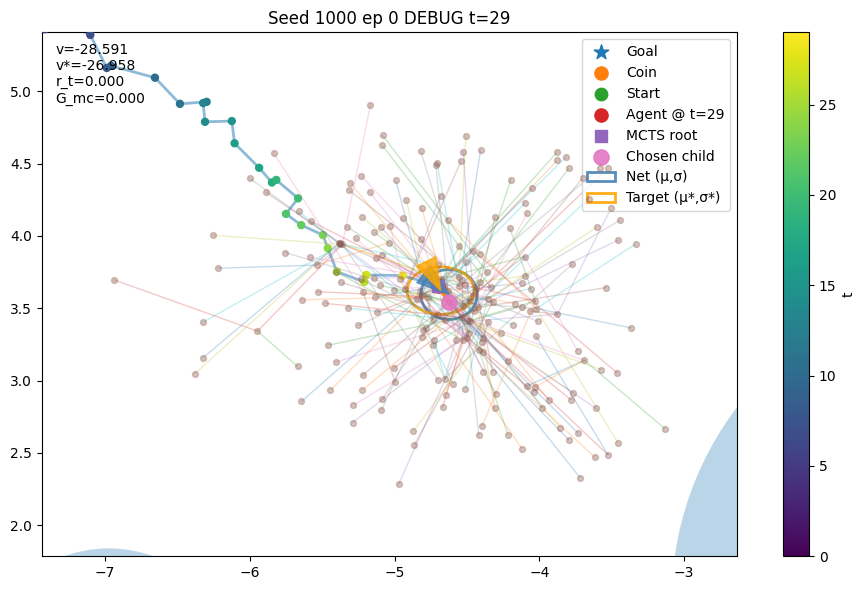

network: (array([ 0.07357934, -0.05871778,  0.01464362], dtype=float32), array([-1.6352873, -1.7579972, -1.9198941], dtype=float32), -28.591447830200195)
target: (array([ 0.01619567, -0.03226821,  0.04824388], dtype=float32), array([-1.4595993, -1.8100227, -1.84522  ], dtype=float32), -26.958239567263607)


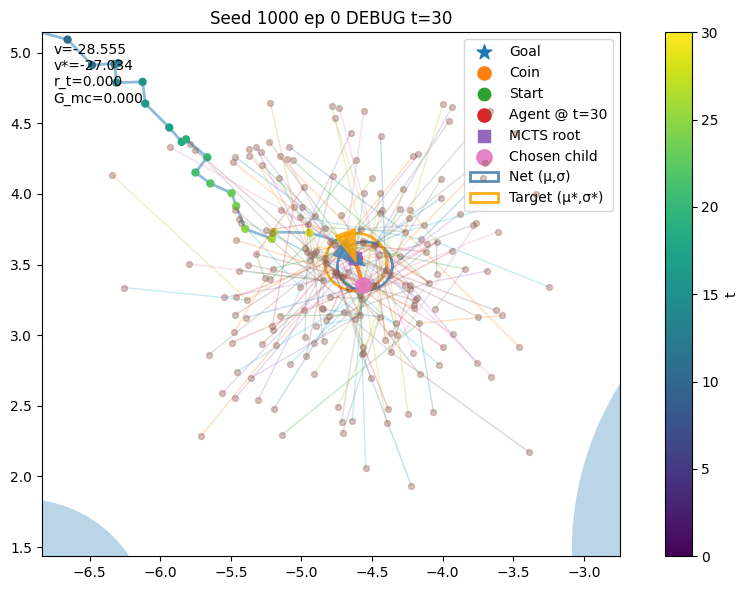

network: (array([ 0.07388358, -0.05704603,  0.01614524], dtype=float32), array([-1.6351361, -1.7580398, -1.9199667], dtype=float32), -28.55474090576172)
target: (array([ 0.01052744, -0.02923505,  0.07270285], dtype=float32), array([-1.5115596, -1.585598 , -1.7497189], dtype=float32), -27.034188936961645)


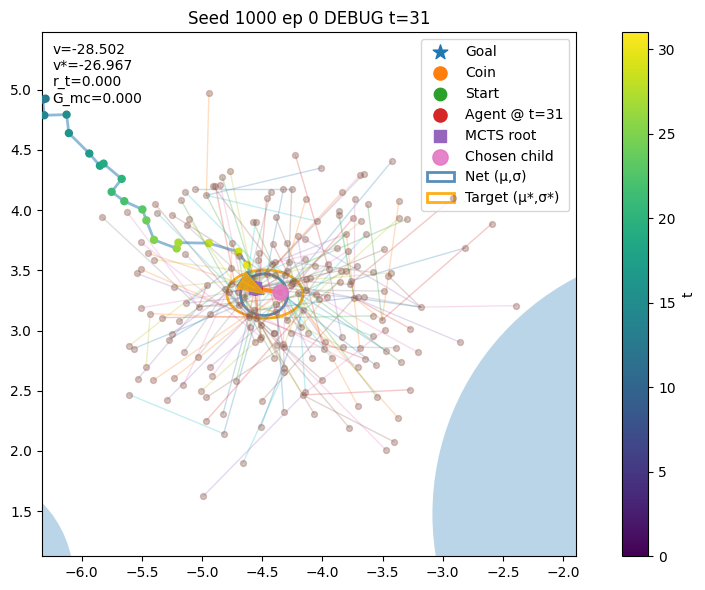

network: (array([ 0.0772889 , -0.05489316,  0.01552607], dtype=float32), array([-1.634574 , -1.75736  , -1.9204872], dtype=float32), -28.501964569091797)
target: (array([ 0.08531586, -0.04917904,  0.06036374], dtype=float32), array([-1.1528801, -1.6058601, -1.5050422], dtype=float32), -26.966511498015787)


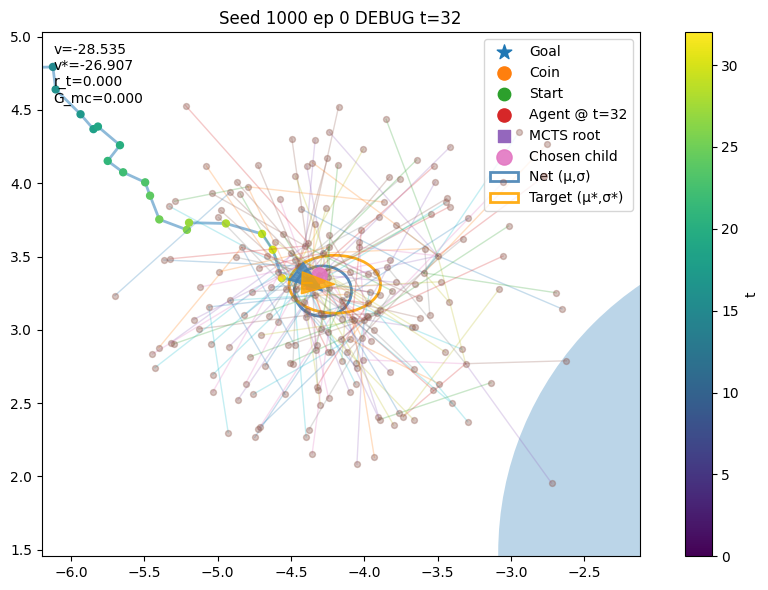

network: (array([ 0.07095844, -0.05422856,  0.01845829], dtype=float32), array([-1.6329608, -1.7567544, -1.9202976], dtype=float32), -28.53458023071289)
target: (array([ 0.15244263, -0.00677266,  0.02675381], dtype=float32), array([-1.1647863, -1.6208476, -1.7899184], dtype=float32), -26.906680628532385)


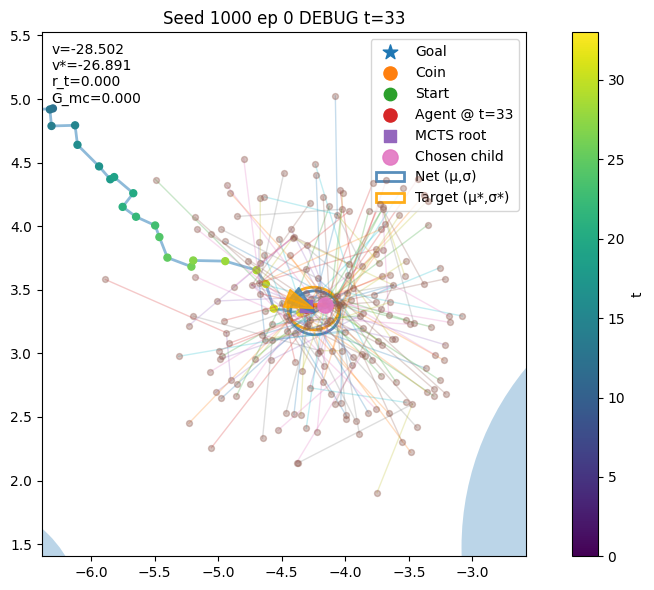

network: (array([ 0.0688197 , -0.05527219,  0.01696035], dtype=float32), array([-1.6328709, -1.756529 , -1.9203771], dtype=float32), -28.502471923828125)
target: (array([ 0.0556925 , -0.02133008,  0.08234155], dtype=float32), array([-1.6047281, -1.7882403, -1.8538848], dtype=float32), -26.89078807900192)


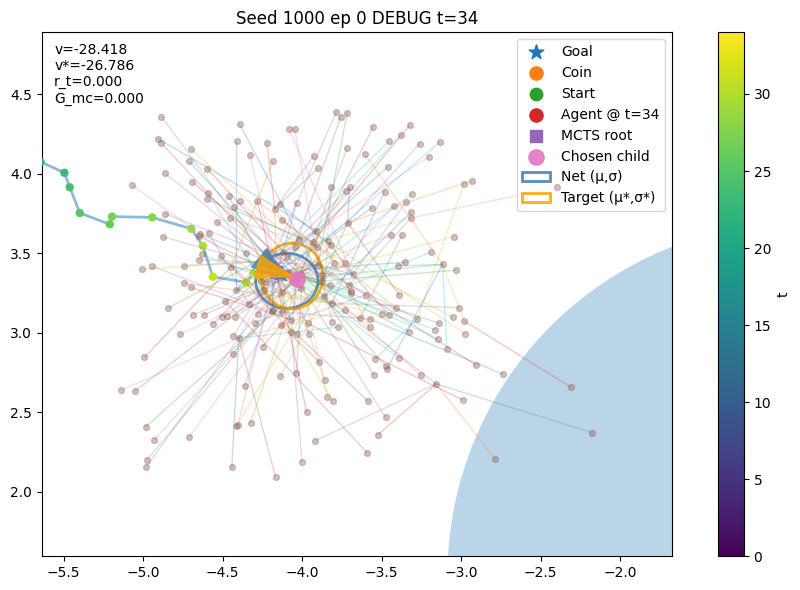

network: (array([ 0.06648719, -0.05611705,  0.01342466], dtype=float32), array([-1.630958 , -1.7545035, -1.9198439], dtype=float32), -28.418418884277344)
target: (array([ 0.09988773, -0.02585864,  0.08528544], dtype=float32), array([-1.6369227, -1.5744193, -1.7409306], dtype=float32), -26.786328110740623)


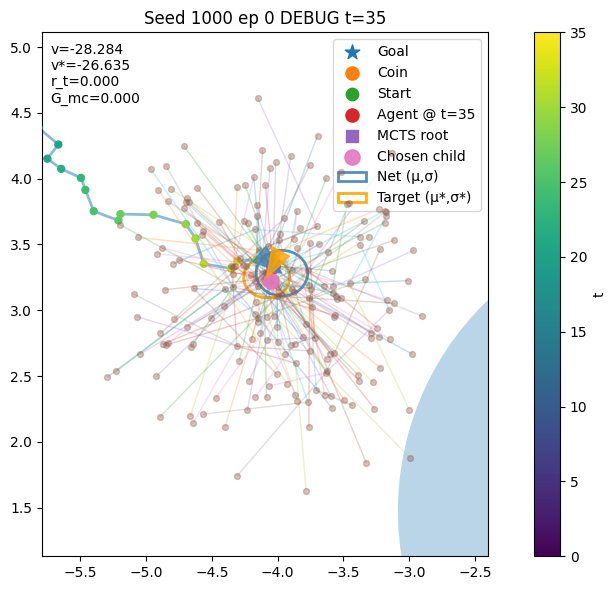

network: (array([ 0.06644168, -0.05662657,  0.00861226], dtype=float32), array([-1.6298525, -1.7528958, -1.9201553], dtype=float32), -28.284332275390625)
target: (array([-0.04901175, -0.08973747, -0.01128134], dtype=float32), array([-1.7469667, -1.8712455, -1.8603382], dtype=float32), -26.634878995680275)


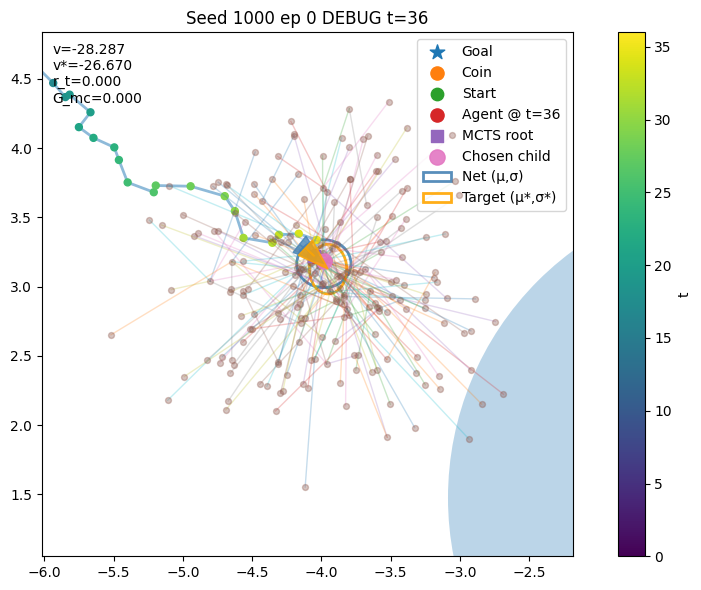

network: (array([ 0.06912827, -0.05503523,  0.01000252], dtype=float32), array([-1.6305692, -1.7536255, -1.9209645], dtype=float32), -28.287031173706055)
target: (array([ 0.09968492, -0.09355654,  0.00767036], dtype=float32), array([-2.0051847, -1.7190309, -2.10267  ], dtype=float32), -26.669708017868892)


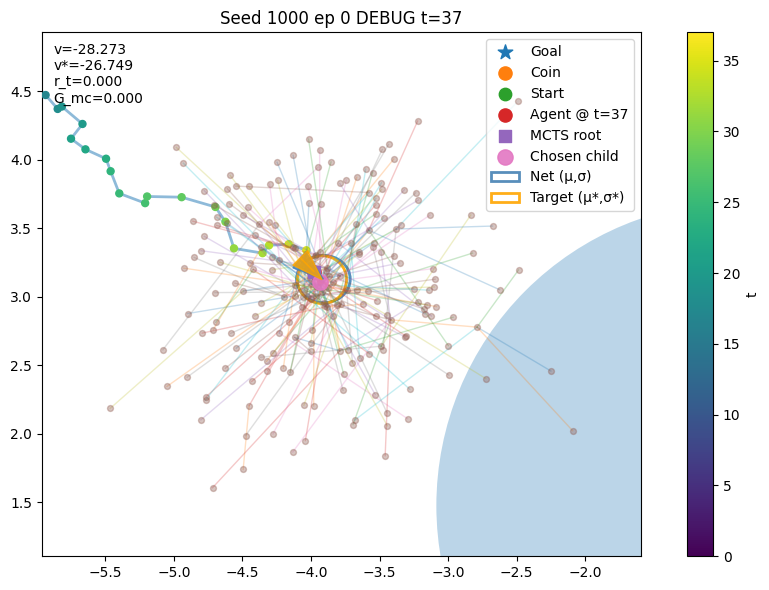

network: (array([ 0.06826735, -0.05453791,  0.01039193], dtype=float32), array([-1.6295277, -1.7529389, -1.9206891], dtype=float32), -28.2725772857666)
target: (array([ 0.058585  , -0.05858747, -0.03398378], dtype=float32), array([-1.719065 , -1.7473643, -1.5515171], dtype=float32), -26.749344615116016)


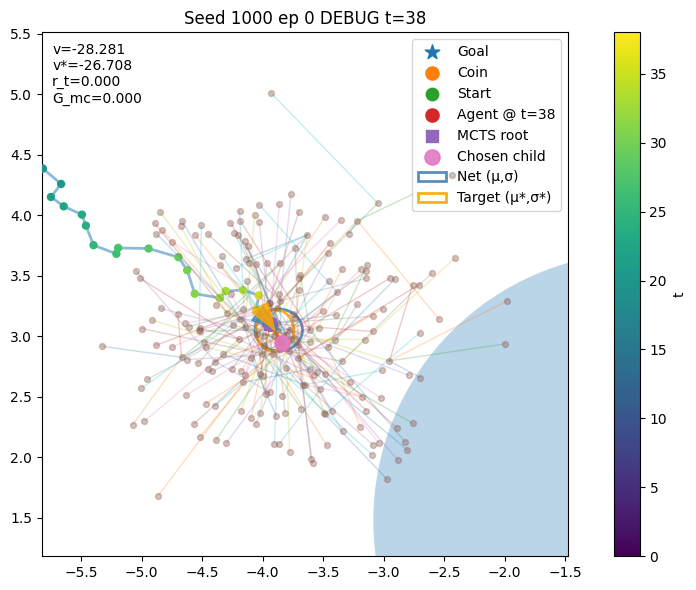

network: (array([ 0.06855977, -0.0533341 ,  0.01208982], dtype=float32), array([-1.6290092, -1.7528411, -1.9207113], dtype=float32), -28.281145095825195)
target: (array([ 0.0369033 , -0.05722235,  0.09507567], dtype=float32), array([-1.858819 , -1.749673 , -1.6468308], dtype=float32), -26.708094011494985)


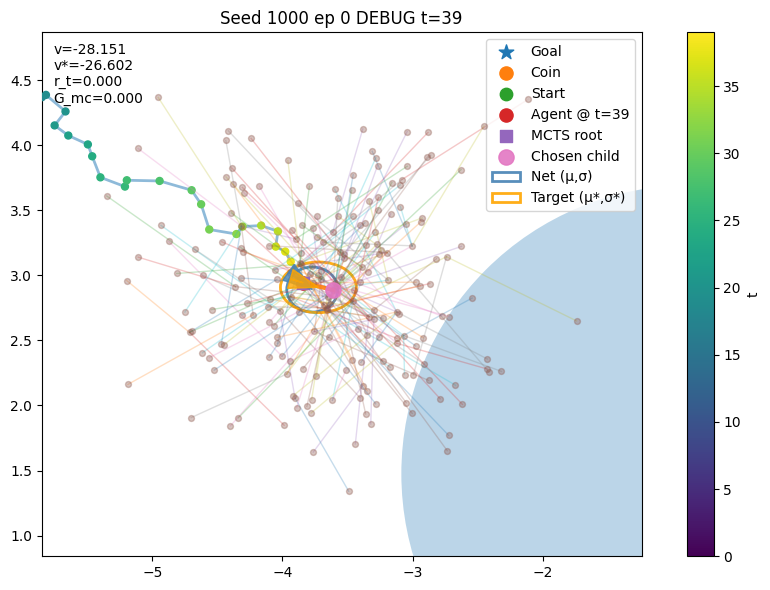

network: (array([ 0.07149029, -0.05214382,  0.00853417], dtype=float32), array([-1.6290733, -1.7523907, -1.9222803], dtype=float32), -28.151126861572266)
target: (array([ 0.11827067, -0.03524216,  0.02829503], dtype=float32), array([-1.231989 , -1.636181 , -1.7568733], dtype=float32), -26.601605961730268)


In [21]:
n = len(traces[seed]["roots"])

for i in range(min(n, 40)):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True, sharey=True)
    plot_dbg_step(
        traces[seed],
        i,
        num_obstacles=env_config.num_obstacles,
        ax=ax,
        max_depth=99,
        top_k_per_node=99,
        title=f"Seed {seed} ep {train_iter} DEBUG t={i}"
    )
    plt.tight_layout()
    plt.show()
    print("network:", traces[seed]["network_outputs"][i])
    print("target:", traces[seed]["targets_from_root"][i])